In [1]:
import pygame
import random
import math

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

pygame 2.4.0 (SDL 2.26.4, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Global Constants

WHITE = (255, 255, 255)
RED = (255, 0, 0)
LIGHT_BLUE = (173, 216, 230)
BLACK = (0, 0, 0)

In [ ]:
# PyGame Implementation - Customizeable Animation

def animate_pi_approx(size=800, numPts=20000):
    
    pygame.init()

    screen = pygame.display.set_mode((size, size))
    pygame.display.set_caption("Approximating Π")
    
    font = pygame.font.Font(None, 25)

    pts = []
    total = 0
    inside = 0
    final = 0

    on = True
    while on:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:  # Close the window manually
                on = False

        if len(pts) > numPts:
            final = (inside/total) * 4
            on = False

        rX, rY = random.uniform(0.0, float(size)), random.uniform(0.0, float(size))
        pts.append((rX, rY))
        total += 1
        assert(total == len(pts))

        if (math.dist((rX, rY), (size/2, size/2)) < size/2):
            inside += 1

        # Draw
        screen.fill(LIGHT_BLUE)
        pygame.draw.circle(screen, WHITE, (size/2, size/2), size/2)

        for pt in pts:
            rX, rY = pt
            pygame.draw.circle(screen, RED, (rX, rY), 2)

        piApproximation = font.render("Π Approximation: "+str((inside/total)*4), True, BLACK)
        screen.blit(piApproximation, (10, 10))

        pointCount = font.render("Number of Points: "+str(len(pts)), True, BLACK)
        screen.blit(pointCount, (10, 30))

        final = (inside/total)*4

        pygame.display.flip()

        # Limit frames per second
        pygame.time.Clock().tick(500)

    # Quit pygame
    pygame.quit()

    return "Size: " + str(size) + ", Number of Points: " + str(numPts) + ", Result: " + str(final)

#animate_pi_approx(400, 5000)
animate_pi_approx(800, 20000)

In [3]:
# Matplot Implementation

def approx_pi_visual(size=500, numPts=10000):
    
    plt.figure(figsize=(6, 6))
    
    plt.xlim(0, size)
    plt.ylim(0, size)
    plt.gca().set_aspect('equal')  # square aspect ratio
    
    crad = size / 2
    ccenter = (size/2, size/2)
    circle = Circle(ccenter, crad, edgecolor='black', facecolor='none', linewidth=2)
    plt.gca().add_patch(circle)
    
    #pts = [0]*numPts
    inside = 0
    
    for _ in range(numPts):
        rX, rY = random.uniform(0.0, float(size)), random.uniform(0.0, float(size))
        #pts[i] = (rX, rY)
        
        dist = math.dist((rX, rY), ccenter)
        if dist <= crad:
            col = 'red'
            inside += 1
        else:
            col = 'blue'
        plt.scatter(rX, rY, color=col, s=10)
    
    plt.title("MC Simulation for Approximating Π")
    plt.show()
    
    return (inside/numPts)*4

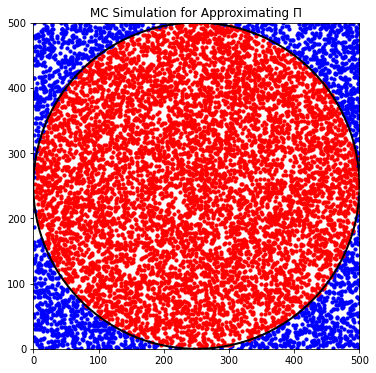

3.1384

In [4]:
approx_pi_visual()

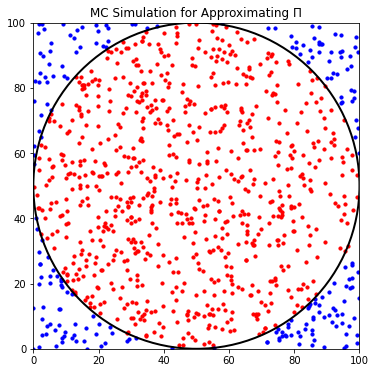

3.144

In [5]:
approx_pi_visual(100, 1000)

In [6]:
def approx_pi(size=1000, numPts=20000, recordPath=False):
    
    inside = 0
    
    center = (size/2, size/2)
    crad = size/2
    
    if (recordPath):
        path = [0]*numPts
    
    for i in range(numPts):
        rX, rY = random.uniform(0.0, float(size)), random.uniform(0.0, float(size))
        if math.dist((rX, rY), center) < crad:
            inside += 1
        if (recordPath):
            path[i] = (i+1, (inside/(i+1))*4) # record approximation at that step
    
    if (recordPath):
        assert(abs((inside/numPts)*4 - path[-1][1])<0.00001)
        return path
    else:
        return (inside/numPts)*4

In [7]:
def viz_perstep_approx(size, numPts):
    
    res = approx_pi(size, numPts, True)
    
    ptNums, approxs = zip(*res)
    plt.plot(ptNums, approxs, marker='o', color='b', linestyle='-', markersize=1)
    plt.title("Π Approximation At Each Additional Point: Size "+str(size))
    plt.xlabel("Point Number")
    plt.ylabel("Π Approximation")
    plt.show()

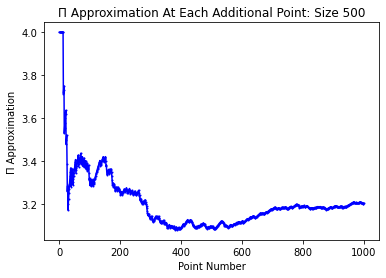

In [8]:
viz_perstep_approx(500, 1000)

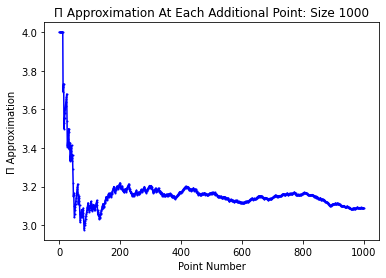

In [9]:
viz_perstep_approx(1000, 1000)

In [10]:
def viz_perstep_approx_multiple(size, numPts, trials):
    colors = plt.cm.viridis([i / trials for i in range(trials)])  # Generate distinct colors for each trial

    for trial in range(trials):
        res = approx_pi(size, numPts, True)
        ptNums, approxs = zip(*res)
        plt.plot(ptNums, approxs, marker='o', linestyle='-', markersize=1, color=colors[trial])
    
    plt.axhline(y=math.pi, color='red', linestyle='--', label='π')
    
    plt.title(f"π Approximation At Each Additional Point (Size: {size}, Trials: {trials})")
    plt.xlabel("Point Number")
    plt.ylabel("π Approximation")
    plt.legend()
    plt.show()

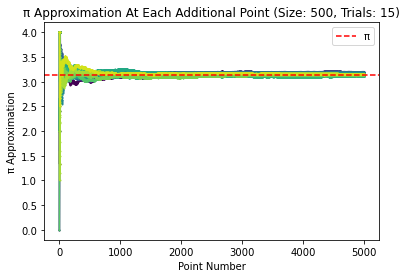

In [11]:
viz_perstep_approx_multiple(500, 5000, 15)

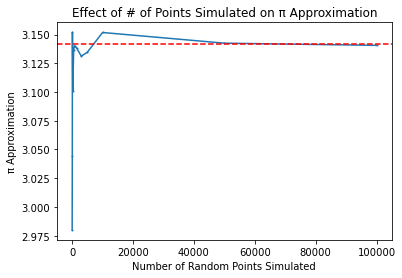

In [12]:
def avg_multiple_trials(size, numPts, trials):
    
    res = 0
    for _ in range(trials):
        res += approx_pi(size, numPts)
    return res/trials

def numpts_influence(size, numPtsArray, trials):
    
    res = []
    for numPts in numPtsArray:
        avg = avg_multiple_trials(size, numPts, trials)
        res.append(avg)
    plt.plot(numPtsArray, res, marker='o', linestyle='-', markersize=1)
    plt.axhline(y=math.pi, color='red', linestyle='--', label='π')
    
    plt.title(f"Effect of # of Points Simulated on π Approximation")
    plt.xlabel("Number of Random Points Simulated")
    plt.ylabel("π Approximation")
    
    plt.show()

numpts_influence(500, [10, 50, 100, 200, 500, 800, 1500, 3000, 5000, 10000, 50000, 100000], 20)